In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os, random, warnings

warnings.filterwarnings('ignore')


In [6]:
image_shape = (224, 224)
batch_size = 32
epochs = 10

data_path = r'C:/Users/Ania/Desktop/dataset2/archive (1)/New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)'
train_folder = os.path.join(data_path, 'train')
valid_folder = os.path.join(data_path,  'valid')
test_folder = os.path.join(data_path,  'test')

#generatory danych dla zbioru treningowego i testowego
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

#załaduj dane
train_data = train_datagen.flow_from_directory(train_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical', subset='training')
valid_data = train_datagen.flow_from_directory(train_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical', subset='validation')
test_data = test_datagen.flow_from_directory(valid_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical')


from tensorflow.keras.models import load_model

model = load_model("cnn_model.keras")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  # dopasuj do preprocessing używanego w modelu

test_generator = test_datagen.flow_from_directory(
   test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)
import numpy as np

# Przewidywane etykiety jako argmax
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Prawdziwe etykiety
y_true = test_generator.classes
from sklearn.metrics import classification_report

# Lista nazw klas, np. z test_generator.class_indices
class_labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
print(report)
from sklearn.metrics import accuracy_score
print("Dokładność ogólna:", accuracy_score(y_true, y_pred))


Found 112488 images belonging to 38 classes.
Found 28102 images belonging to 38 classes.
Found 34384 images belonging to 38 classes.
Found 760 images belonging to 38 classes.
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     1.0000    1.0000    1.0000        20
                                 Apple___Black_rot     0.9524    1.0000    0.9756        20
                          Apple___Cedar_apple_rust     1.0000    0.9500    0.9744        20
                                   Apple___healthy     0.9091    1.0000    0.9524        20
                               Blueberry___healthy     0.9474    0.9000    0.9231        20
          Cherry_(including_sour)___Powdery_mildew     1.0000    0.9500    0.9744        20
                 Cherry_(including_sour)___healthy     1.0000    1.0000    1.0000        20
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_

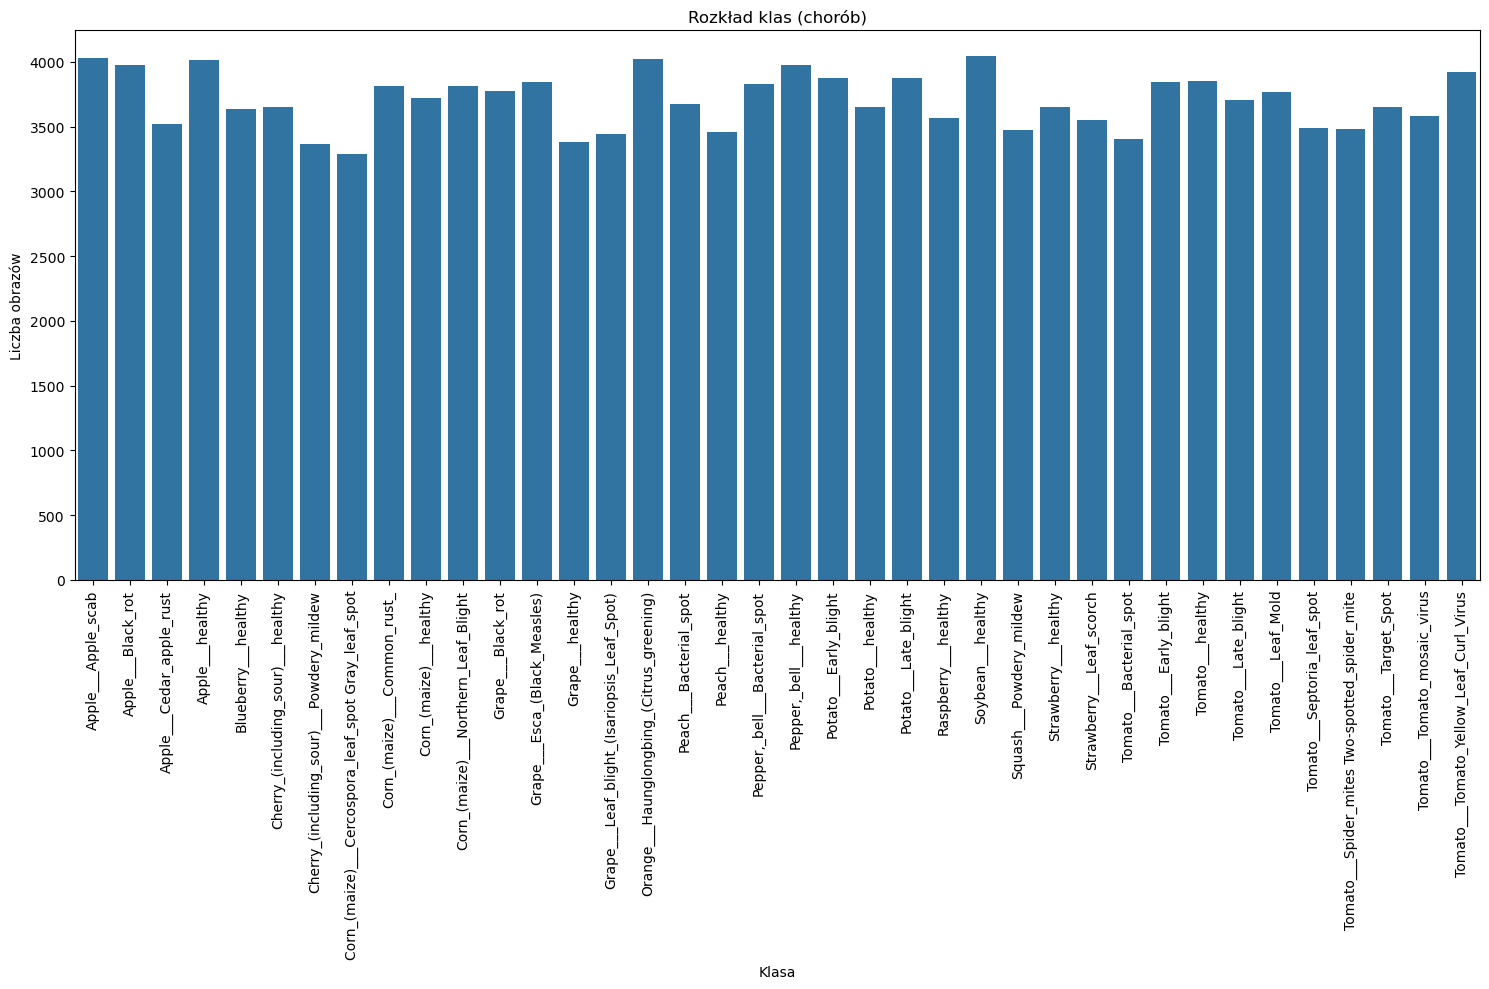

In [11]:
class_counts = {cls: len(os.listdir(os.path.join(train_folder, cls))) for cls in diseases}
df = pd.DataFrame(list(class_counts.items()), columns=["Klasa", "Liczba obrazów"])
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Klasa', y='Liczba obrazów')
plt.xticks(rotation=90)
plt.title("Rozkład klas (chorób)")
plt.tight_layout()
plt.show()


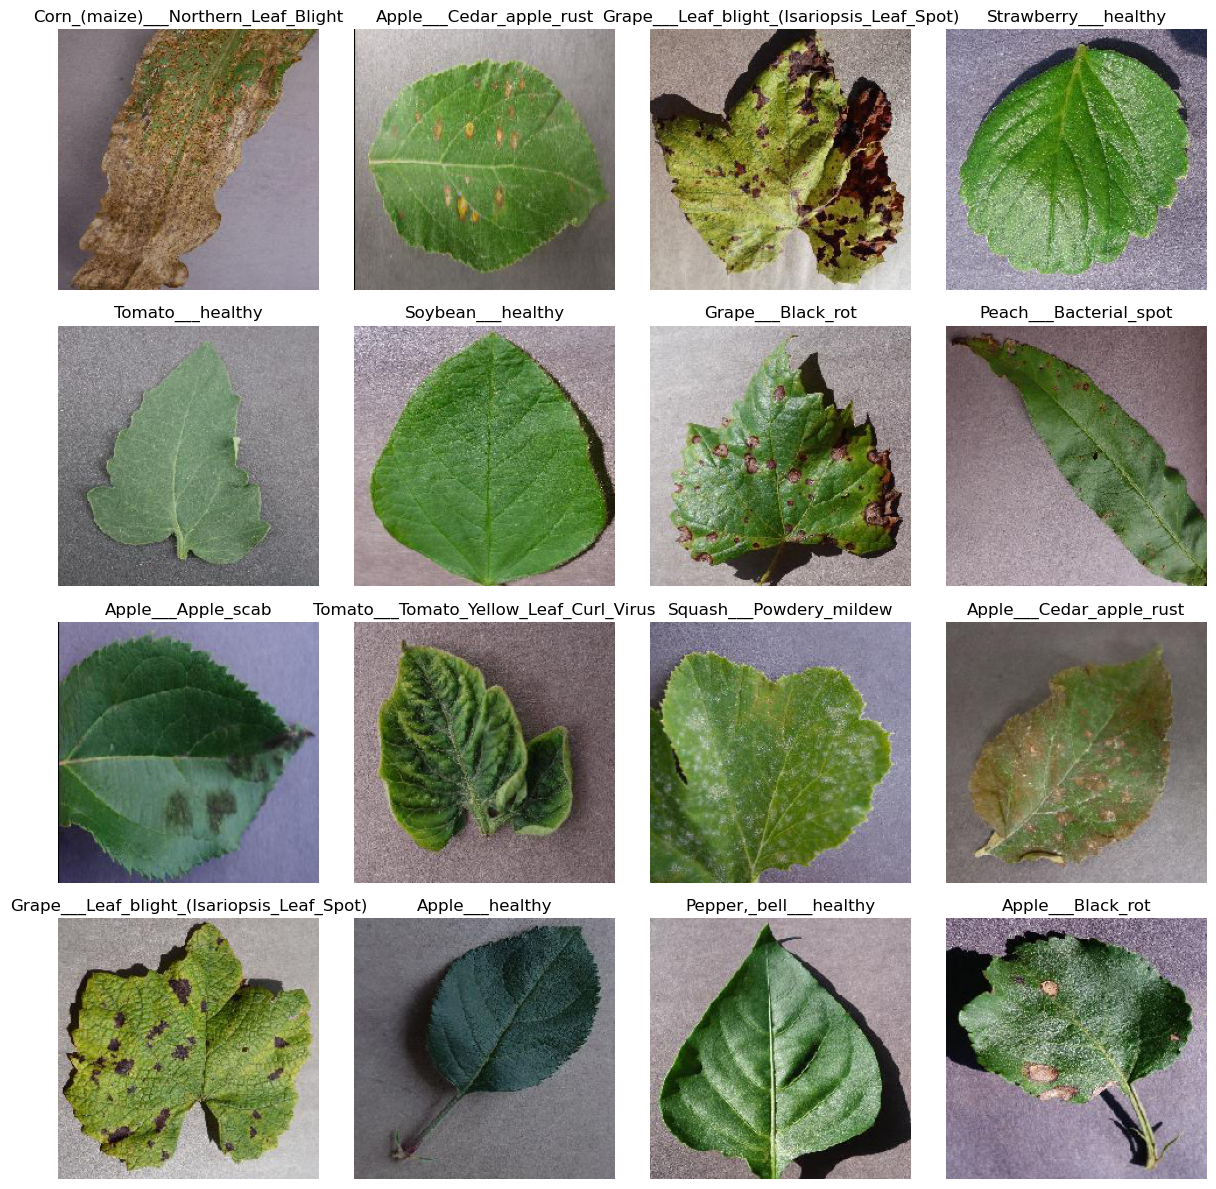

In [13]:
images, labels = next(iter(train_data))
indices = random.sample(range(len(images)), 16)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(indices):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[idx])
    plt.title(list(train_data.class_indices.keys())[np.argmax(labels[idx])])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [14]:
model = Sequential()

#blok konwolucyjny 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2, 2))

#blok konwolucyjny 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2, 2))

#blok konwolucyjny 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2, 2))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())  # normalizuje wyjście poprzedniej warstwy
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 365,446 (1.39 MB)

 Trainable params: 364,550 (1.39 MB)

 Non-trainable params: 896 (3.50 KB)

In [19]:
checkpoint = ModelCheckpoint('cnn_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(patience=3, monitor='val_accuracy', mode='max', restore_best_weights=True)

history = model.fit(train_data, validation_data=valid_data, epochs=epochs, callbacks=[checkpoint, early_stop])


Epoch 1/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 10284s 6s/step - accuracy: 0.3312 - loss: 2.4090 - val_accuracy: 0.5186 - val_loss: 1.6470
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9782s 6s/step - accuracy: 0.7386 - loss: 0.8404 - val_accuracy: 0.7919 - val_loss: 0.6490
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9619s 5s/step - accuracy: 0.8381 - loss: 0.5122 - val_accuracy: 0.8710 - val_loss: 0.3912
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9612s 5s/step - accuracy: 0.8868 - loss: 0.3561 - val_accuracy: 0.6191 - val_loss: 1.5439
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9737s 6s/step - accuracy: 0.9068 - loss: 0.2912 - val_accuracy: 0.9343 - val_loss: 0.2003
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9637s 5s/step - accuracy: 0.9328 - loss: 0.2115 - val_accuracy: 0.8965 - val_loss: 0.2985
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9482s 5s/step - accuracy: 0.9421 - loss: 0.1802 - val_accuracy: 0.9352 - val_loss: 0.1840
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 9434s 5s/step - accuracy: 0.9514 

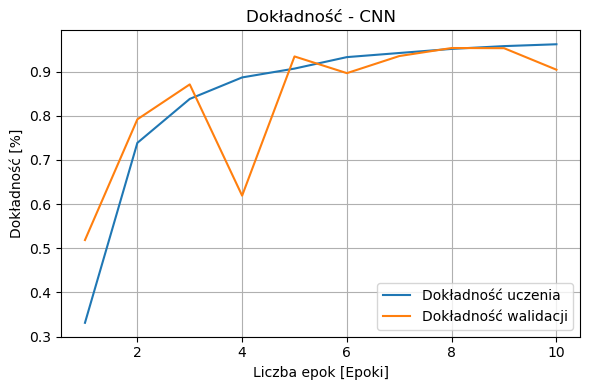

In [5]:
import matplotlib.pyplot as plt

# Dokładności z epok
accuracy = [0.3312, 0.7386, 0.8381, 0.8868, 0.9068, 0.9328, 0.9421, 0.9514, 0.9577, 0.9619]
val_accuracy = [0.5186, 0.7919, 0.8710, 0.6191, 0.9343, 0.8965, 0.9352, 0.9534, 0.9530, 0.9043]

epochs = list(range(1, 11))

plt.figure(figsize=(6, 4))

plt.plot(epochs, accuracy, label='Dokładność uczenia',)
plt.plot(epochs, val_accuracy, label='Dokładność walidacji')
plt.title('Dokładność - CNN')
plt.xlabel('Liczba epok [Epoki]')
plt.ylabel('Dokładność [%]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
best_model = load_model('cnn_model.keras')
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


550/550 ━━━━━━━━━━━━━━━━━━━━ 786s 1s/step - accuracy: 0.9570 - loss: 0.1325
Test Accuracy: 0.9590, Test Loss: 0.1263


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
train_data


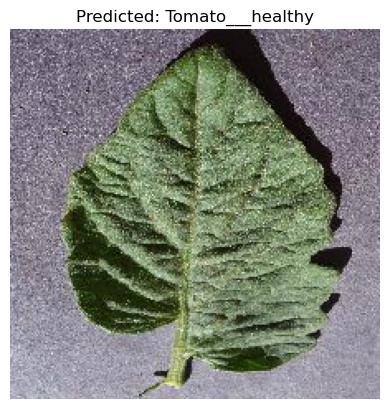

Top 5 prawdopodobieństw:
Tomato___healthy: 100.00%
Tomato___Target_Spot: 0.00%
Tomato___Spider_mites Two-spotted_spider_mite: 0.00%
Tomato___Late_blight: 0.00%
Tomato___Leaf_Mold: 0.00%


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

model_path = 'cnn_model.keras'  # lub 'mobilenetv2_best.keras'
image_path = 'C:/Users/Ania/Desktop/dataset/PlantVillage/val/Tomato___healthy/0f9a114d-1df8-442c-90e7-d14d2f6efb23___RS_HL 9964.jpg'  # ścieżka do jednego obrazu testowego
image_size = (224, 224)  # rozmiar zgodny z modelem

model = load_model(model_path)

#pobierz i przygotuj obrazek
img = load_img(image_path, target_size=image_size)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

#predykcja
predictions = model.predict(img_array)
top_indices = predictions[0].argsort()[::-1][:5]  # TOP 5 klas
print("train_data")
# Nazwy klas z train_data
class_labels = list(train_data.class_indices.keys())  # Upewnij się, że train_data istnieje

#obraz z predykcją
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_labels[np.argmax(predictions)]}")
plt.show()

print("Top 5 prawdopodobieństw:")
for i in top_indices:
    print(f"{class_labels[i]}: {predictions[0][i]*100:.2f}%")


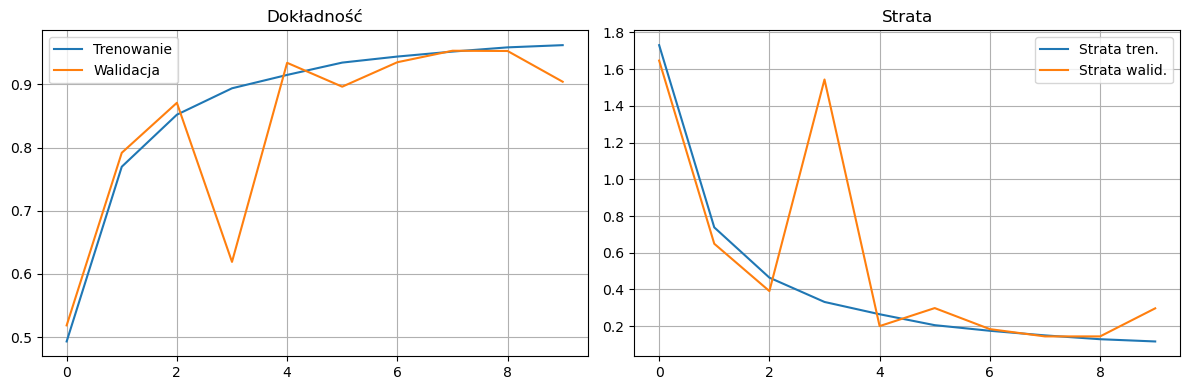

In [33]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    # Dokładność
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Trenowanie')
    plt.plot(history.history['val_accuracy'], label='Walidacja')
    plt.title('Dokładność')
    plt.legend()
    plt.grid()

    # Strata
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Strata tren.')
    plt.plot(history.history['val_loss'], label='Strata walid.')
    plt.title('Strata')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

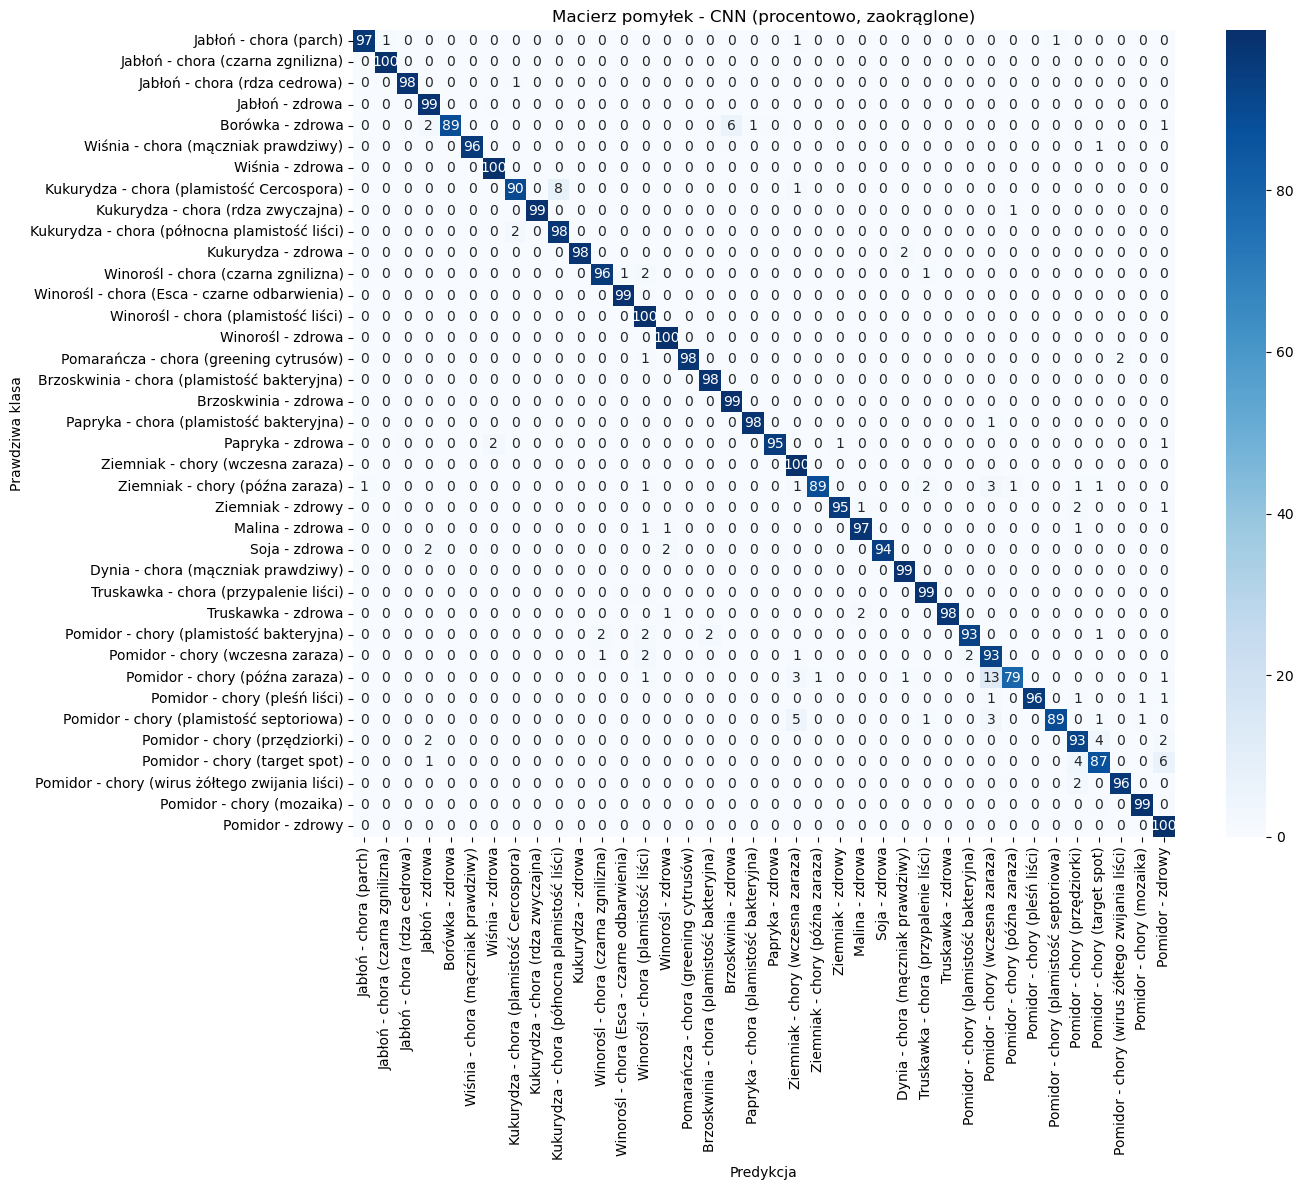

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

model = load_model("cnn_model.keras")
class_names = [
    'Jabłoń - chora (parch)', 'Jabłoń - chora (czarna zgnilizna)', 'Jabłoń - chora (rdza cedrowa)', 'Jabłoń - zdrowa',
    'Borówka - zdrowa', 'Wiśnia - chora (mączniak prawdziwy)', 'Wiśnia - zdrowa',
    'Kukurydza - chora (plamistość Cercospora)', 'Kukurydza - chora (rdza zwyczajna)',
    'Kukurydza - chora (północna plamistość liści)', 'Kukurydza - zdrowa',
    'Winorośl - chora (czarna zgnilizna)', 'Winorośl - chora (Esca - czarne odbarwienia)',
    'Winorośl - chora (plamistość liści)', 'Winorośl - zdrowa',
    'Pomarańcza - chora (greening cytrusów)', 'Brzoskwinia - chora (plamistość bakteryjna)',
    'Brzoskwinia - zdrowa', 'Papryka - chora (plamistość bakteryjna)', 'Papryka - zdrowa',
    'Ziemniak - chory (wczesna zaraza)', 'Ziemniak - chory (późna zaraza)', 'Ziemniak - zdrowy',
    'Malina - zdrowa', 'Soja - zdrowa', 'Dynia - chora (mączniak prawdziwy)',
    'Truskawka - chora (przypalenie liści)', 'Truskawka - zdrowa',
    'Pomidor - chory (plamistość bakteryjna)', 'Pomidor - chory (wczesna zaraza)', 'Pomidor - chory (późna zaraza)',
    'Pomidor - chory (pleśń liści)', 'Pomidor - chory (plamistość septoriowa)',
    'Pomidor - chory (przędziorki)', 'Pomidor - chory (target spot)',
    'Pomidor - chory (wirus żółtego zwijania liści)', 'Pomidor - chory (mozaika)', 'Pomidor - zdrowy'
]

#przewidywanie seriami
y_true = []
y_pred = []

for i in range(len(test_data)):
    x_batch, y_batch = test_data[i]
    preds = model.predict(x_batch, verbose=0)
    
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

    if (i + 1) * test_data.batch_size >= test_data.samples:
        break

#macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

#normalizowaniw w % (zaokrąglonie)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

#wizualizacja
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Macierz pomyłek - CNN (procentowo, zaokrąglone)")
plt.xlabel("Predykcja")
plt.ylabel("Prawdziwa klasa")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()